In [49]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split

In [50]:
n_samples = 20
weight = np.random.normal(loc=50, scale=10, size=n_samples)  # Peso dos ratos em gramas
size = 30 + 0.5 * weight + np.random.normal(loc=0, scale=5, size=n_samples)
tail_size = size * np.random.uniform(0.001, 0.1, 1)
rats = {
    'weight': weight,
    'size': size,
    'tail_size': tail_size
}
dataframe = pd.DataFrame(rats)
dataframe

,weight,size,tail_size
0,55.779175,55.600184,3.899268
1,32.760640,45.130853,3.165048
2,38.051883,55.288974,3.877442
3,40.224771,46.871003,3.287086
4,57.328703,69.122409,4.847588
5,37.990729,50.370719,3.532523
6,50.093590,56.284449,3.947256
7,41.950386,46.265674,3.244634
8,47.176638,47.061547,3.300449
9,52.167601,58.737522,4.119291


<Axes: >

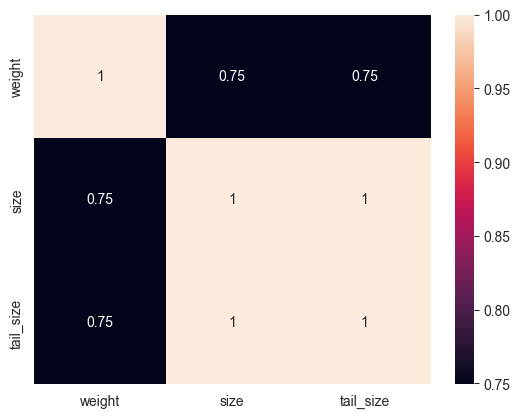

In [51]:
sns.heatmap(dataframe.corr(), annot=True)

In [52]:
X = dataframe.drop('weight', axis=1)
X = sm.add_constant(X)
y = dataframe['weight']
model = sm.OLS(y, X)
results = model.fit()

In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     23.08
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           0.000142
Time:                        14:31:50   Log-Likelihood:                -65.584
No. Observations:                  20   AIC:                             135.2
Df Residuals:                      18   BIC:                             137.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9995     12.038     -0.498      0.624     -31.290      19.291
size           1.0191      0.212      4.804      0.000       0.573       1.465
tail_size      0.0715      0.015      4.804      0.000       0.040       0.103
==============================================================================
Omnibus:                        0.121   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.114
Skew:                          -0.116   Prob(JB):                        0.945
Kurtosis:                       2.712   Cond. No.                     6.91e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Lasso

In [54]:
lasso_model = sm.OLS(y, X)
lasso_model_results = lasso_model.fit_regularized(method='sqrt_lasso', alpha=0.01)
lasso_model_results.params

const       -5.793231e+00
size         1.020439e+00
tail_size    6.267101e-07
dtype: float64

In [55]:
lasso_model = sm.OLS(y, X)
lasso_model_results = lasso_model.fit_regularized(method='sqrt_lasso', alpha=0.1)
lasso_model_results.params

const       -3.932394e+00
size         9.877415e-01
tail_size    6.835421e-07
dtype: float64

In [56]:
lasso_model = sm.OLS(y, X)
lasso_model_results = lasso_model.fit_regularized(method='sqrt_lasso', alpha=0.5)
lasso_model_results.params

const       -2.232059e-06
size         9.186219e-01
tail_size    2.933306e-07
dtype: float64

In [57]:
lasso_model = sm.OLS(y, X)
lasso_model_results = lasso_model.fit_regularized(method='sqrt_lasso', alpha=1)
lasso_model_results.params

const       -2.723371e-08
size         9.185779e-01
tail_size    1.335230e-07
dtype: float64

## Lasso usando sklearn

In [58]:
X = dataframe.drop('weight', axis=1)
y = dataframe['weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred_lr = lr.predict(X_test)

In [76]:
lasso = Lasso(alpha=0.00001)
lasso.fit(X_train, y_train)

Lasso(alpha=1e-05)

In [77]:
y_lasso_pred = lasso.predict(X_test)

In [78]:
print('Linear Regression Accuracy:', metrics.r2_score(y_test, y_pred_lr))
print('Lasso Regression Accuracy:', metrics.r2_score(y_test, y_lasso_pred))

Linear Regression Accuracy: 0.614862600129163
Lasso Regression Accuracy: 0.6148625045784615
